# Prognosis of cardiovascular events: from logistic regression to deep learning
                            Laura I. Queipo and Efrain Nava
                              Applied Computing Institute
                            University of Zulia, Venezuela
                       lqueipom@gmail.com, enava@ica.luz.edu.ve

                                   Progress report
                                 February 14th, 2018

## Introduction

Relevance. According to a report of the American Heart Association Statistics (2016), heart disease is the leading cause of death for both men and women and responsible for 1 in every 4 deaths, even modest improvements in prognostic models of heart event and complications could save literally hundreds of lives and help to significantly reduce the cost of health care services, medications, and lost productivity.


## Methods 

Deep neural networks (DNN) represents a set of modern machine learning (ML) models that have gain widespread recognition because they were behind the first FDA (US food and drug administration) approved machine learning application in healthcare; to be approved it had to pass tests to show it can produce results at least as accurately as humans are currently able to. Recently, such ML models were also used to detect with cardiologist-level accuracy 14 types of arrhythmias (sometime life-threatening heart beats) form ECG-electrocardiogram signals generated by wearable monitors. 

## Original contribution

Studies exploring the potential of this technology for the prognosis of cardiovascular events/complications from risk factors have been limited; events/complications are, for example, coronary artery disease, stroke and congestive heart failure, and risk factors are those established by the American College of Cardiology/American Heart Association (ACC/AHA) such as age, high blood pressure, high LDL cholesterol, and smoking and others, such as, systolic blood pressure variability, kidney disease, and ethnicity. 

Most of previous studies have either used logistic regression or classical machine learning algorithms such as random forest, gradient boosting and neural networks (non-deep); in addition, comparison studies of the cited algorithms with deep learning models in the specific prognosis context under consideration are not readily available. 

## Research objectives

Establish the relative performance of deep learning models, such as deep belief networks and convolutional neural networks, and ensembles with respect to classical machine learning algorithms (including logistic regression) using cases studies built from well-known heart disease data sets such as the Cleveland set available from the UCI repository. Research questions of interest are, for example, for what would be the threshold of sample size in heart disease studies where the more complex but potentially more effective deep learning models would be recommended?, would ensembles of machine learning models be able to provide more robust predictions as it has been the case in other knowledge domains?, does the ACC/AHA list of eight risk factors should be updated with other genetic or lifestyle factors?. The deep learning models will be implemented in Tensorflow (originally from Google, now open source) and healthcare.ai, an open source that facilitate the development of machine learning in healthcare, with the prevision that can handle so called big data by using the Hadoop/Spark platform.   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
variable_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
dataset1=pd.read_csv("Heart_Disease_Data.csv")
dataset1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [5]:
#### count missing value in terms of colunms #######
#dataset.shape[0] - dataset.count()
dataset1.isnull()
dataset1.isnull().any()

age               False
sex               False
cp                False
trestbps          False
chol              False
fbs               False
restecg           False
thalach           False
exang             False
oldpeak           False
slop              False
ca                False
thal              False
pred_attribute    False
dtype: bool

In [6]:
dataset1.duplicated().any()

False

There is no missing value and any duplicated data in this dataset.

# 1. Preliminary description of the data.
Box plots and histograms were used for continuous and categorical variables.
Basic statistics are also available.

# Univariate analysis

# Continuous variables 
basic statistics + Box plots + histograms 

In [7]:
## basic statistic descriptions
continuas=["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
dataset1[continuas].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


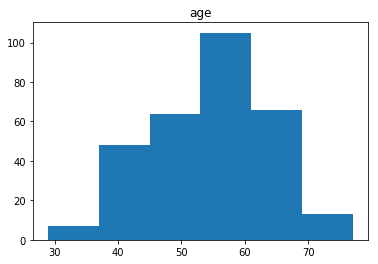

In [8]:
## age histogram
ag= np.array(dataset1['age']) 
plt.hist(ag, bins = 6) 
plt.title("age") 
plt.show()

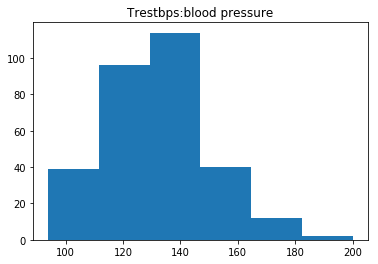

In [9]:
## trestbps histogram
tp= np.array(dataset1['trestbps']) 
plt.hist(tp, bins=6) 
plt.title("Trestbps:blood pressure") 
plt.show()

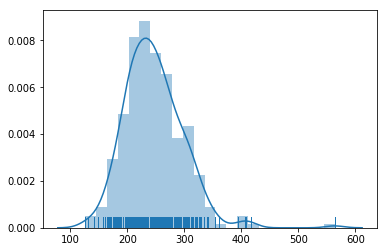

In [10]:
## chol histogram
ch= np.array(dataset1['chol'])
sns.distplot(ch, rug=True, hist=True)


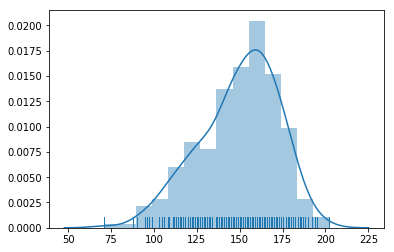

In [11]:
## thalach histogram and distribution 
tl= np.array(dataset1['thalach'])
sns.distplot(tl, rug=True, hist=True)

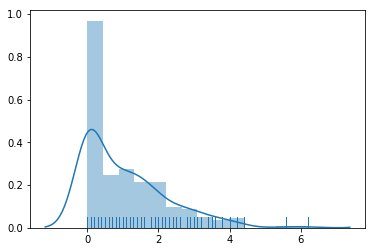

In [12]:
## oldpeak histogram and distribution 
op= np.array(dataset1['oldpeak'])
sns.distplot(op, rug=True, hist=True)

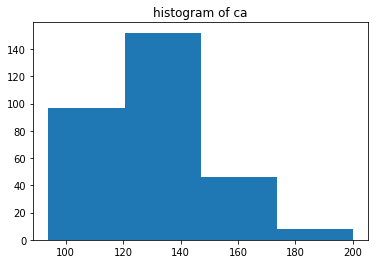

In [13]:
## thalach histogram
ca= np.array(dataset1['ca']) 
plt.hist(tp, bins=4) 
plt.title("histogram of ca") 
plt.show()

### Categorical variables 
##### Histograms + basic statistics

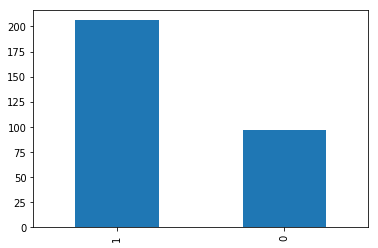

In [14]:
#Sex: sex (1 = male; 0 = female) 
tempo5 = dataset1['sex']
tempo5.value_counts().plot(kind="bar")

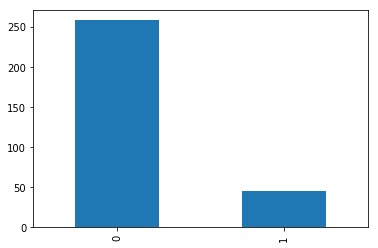

In [15]:
#Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
tempo6 = dataset1['fbs']
tempo6.value_counts().plot(kind="bar")

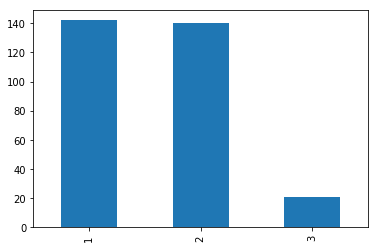

In [16]:
#Slope: the slope of the peak exercise ST segment  
#Value 1: upsloping 
#Value 2: flat 
#Value 3: downsloping
tempo7 = dataset1['slop']
tempo7.value_counts().plot(kind="bar")

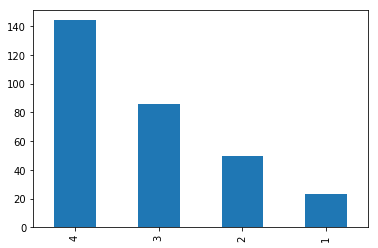

In [17]:
#Cp: chest pain type
#Value 1: typical angina 
#Value 2: atypical angina 
#Value 3: non-anginal pain 
#Value 4: asymptomatic 
tempo8 = dataset1['cp']
tempo8.value_counts().plot(kind="bar")

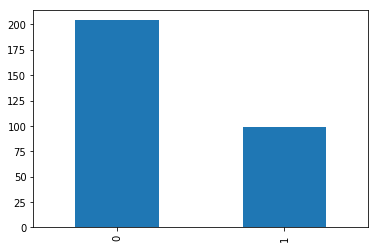

In [18]:
#Exang: exercise induced angina (1 = yes; 0 = no) 
tempo9 = dataset1['exang']
tempo9.value_counts().plot(kind="bar")

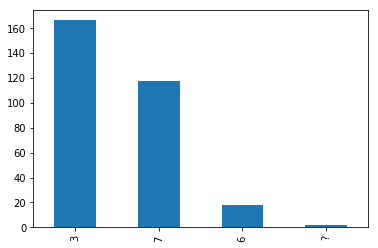

In [19]:
#Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
tempo10 = dataset1['thal']
tempo10.value_counts().plot(kind="bar")

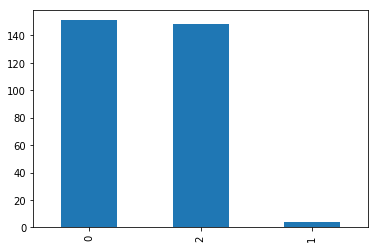

In [20]:
#Restecg: resting electrocardiographic results 
#Value 0: normal 
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
tempo11 = dataset1['restecg']
tempo11.value_counts().plot(kind="bar")

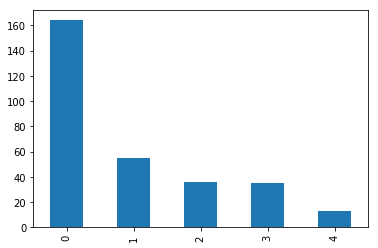

In [21]:
#Class: diagnosis of heart disease (angiographic disease status) 
#Value 0: < 50% diameter narrowing (Healthy)
#Value 1: > 50% diameter narrowing (Sick)
tempo12 = dataset1['pred_attribute']
tempo12.value_counts().plot(kind="bar")

# Multivariate analysis

In [22]:
##### correlation between  
dataset2.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,pred_attribute
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


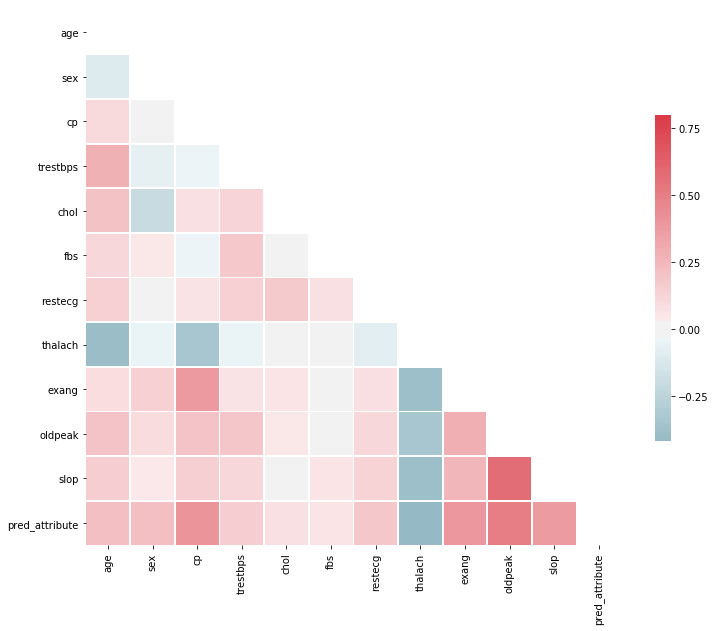

In [23]:
corr = dataset1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


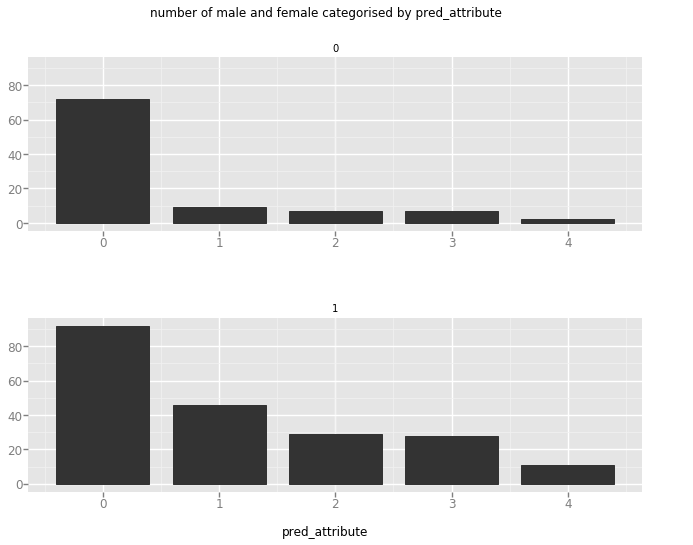

<ggplot: (299810778)>

In [24]:
from ggplot import *
p = ggplot(dataset1,aes(x='pred_attribute'))
p + geom_bar()+labs(title ="number of male and female categorised by pred_attribute")+facet_wrap('sex') #### relationship between pred_attribute and sex

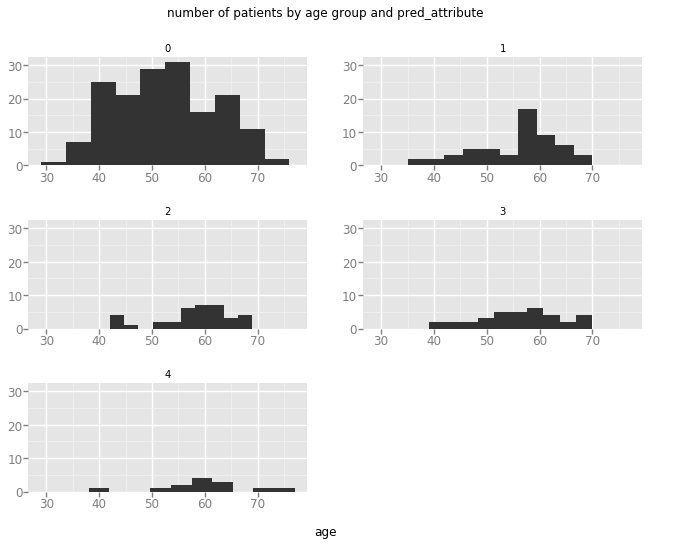

<ggplot: (298630390)>

In [25]:
##### relationship between age and trestbps
p = ggplot(dataset1,aes(x='age'))
p+geom_histogram()+labs(title ="number of patients by age group and pred_attribute")+facet_wrap('pred_attribute')


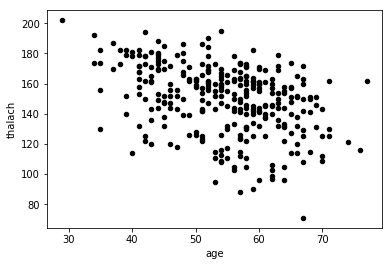

In [26]:
dataset1.plot.scatter(x='age',y='thalach',color='black')

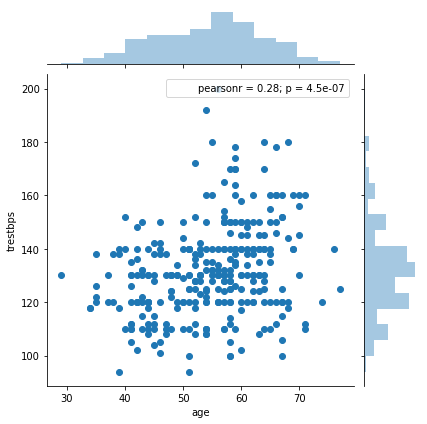

In [28]:
sns.jointplot(x="age", y="trestbps", data=dataset1)
#p=ggplot(dataset1,aes(x='age',y='trestbps'))
#p+geom_line()+facet_wrap('pred_attribute')

In [29]:
p=ggplot(dataset1,aes(x='age',y='thalach'))
p+geom_line()+facet_wrap('pred_attribute')+labs(title ="

SyntaxError: EOL while scanning string literal (<ipython-input-29-497bbb07d708>, line 2)

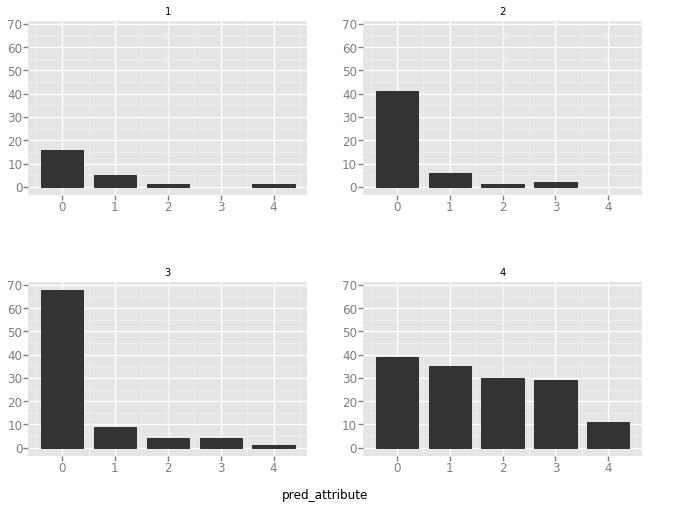

<ggplot: (301634487)>

In [30]:
p = ggplot(dataset1,aes(x='pred_attribute'))
p + geom_bar()+facet_wrap('cp') 

In [31]:
p = ggplot(dataset1,aes(x='pred_attribute'))
p + geom_bar()+facet_wrap('fbs')+


SyntaxError: invalid syntax (<ipython-input-31-f38f317ae69e>, line 2)

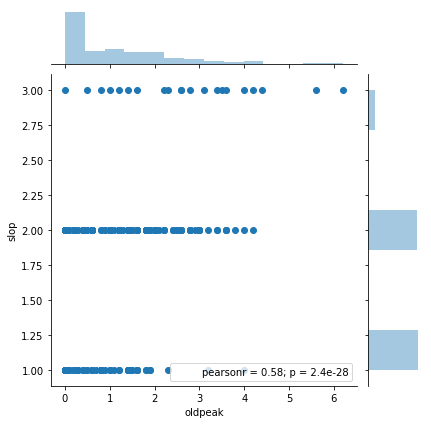

In [32]:
sns.jointplot(x="oldpeak", y="slop", data=dataset1)

# data processing
 outlier and balance

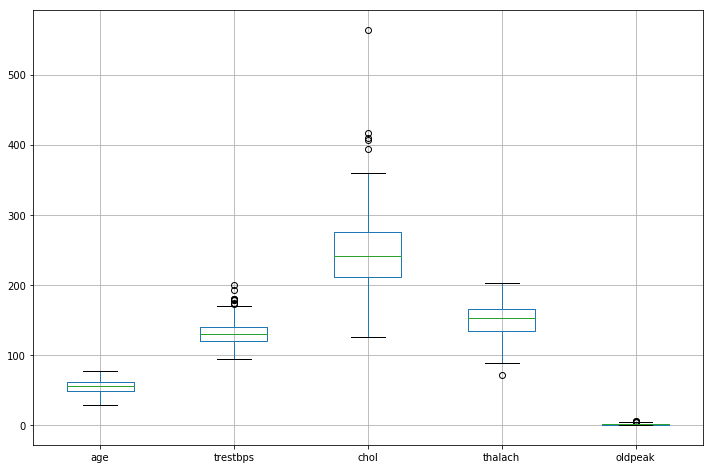

In [35]:
## Boxplots of all continuous variable
continuas=["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
dataset1[continuas].boxplot(return_type='axes', figsize=(12,8))
plt.show()

In [40]:
### show the patients whose trestbps above 180
print(dataset1[dataset1['trestbps']>=180])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
83    68    1   3       180   274    1        2      150      1      1.6   
126   56    0   4       200   288    1        2      133      1      4.0   
188   54    1   2       192   283    0        2      195      0      0.0   
201   64    0   4       180   325    0        0      154      1      0.0   
231   55    0   4       180   327    0        1      117      1      3.4   

     slop ca thal  pred_attribute  
83      2  0    7               3  
126     3  2    7               3  
188     1  1    7               1  
201     1  0    3               0  
231     2  0    3               2  


In [41]:
### show the patients whose chol above 370
print(dataset1[dataset1['chol']>400])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    65    0   3       140   417    1        2      157      0      0.8   
121   63    0   4       150   407    0        2      154      0      4.0   
152   67    0   3       115   564    0        2      160      0      1.6   
181   56    0   4       134   409    0        2      150      1      1.9   

     slop ca thal  pred_attribute  
48      1  1    3               0  
121     2  3    7               4  
152     2  0    7               0  
181     2  2    7               2  


In [42]:
### show the patients whose thalach below 180
print(dataset1[dataset1['thalach']<90])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
175   57    1   4       152   274    0        0       88      1      1.2   
245   67    1   4       120   237    0        0       71      0      1.0   

     slop ca thal  pred_attribute  
175     2  1    7               1  
245     2  0    3               2  


In [43]:
### show the patients whose thalach below 180
print(dataset1[dataset1['oldpeak']>5])


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
91    62    0   4       160   164    0        2      145      0      6.2   
123   55    1   4       140   217    0        0      111      1      5.6   

     slop ca thal  pred_attribute  
91      3  3    7               3  
123     3  0    7               3  


In [44]:
#### delete outliers by mean
dataset1=dataset1.drop([83,126,188,201,231,48,121,152,181,175,245,91,123])


### 2. Define training and test samples. 

The Cleveland data set available from the UCI repository has 303 samples; the training and test data sets were randomly selected with 30% of the original data set corresponding to the test data set.  The relative proportions of the classes of interest (disease/no disease) in both sets were checked to be similar.

In [ ]:
dataset.dropna(inplace=True, axis=0, how="any")
X=dataset.loc[:, "age":"thal" ]
Y=dataset["pred_attribute"]

In [ ]:
# evaluate the model by splitting into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [ ]:
freqs = pd.DataFrame({ "Training dataset": Y_train.value_counts().tolist(), "Test dataset":Y_test.value_counts().tolist(), "Total": Y.value_counts().tolist()}, index=["Healthy", "Sick"])
freqs[["Training dataset", "Test dataset", "Total"]]

In [ ]:
# instantiate a logistic regression model, and fit with X and y (with training data in X,y)
model = LogisticRegression()
model.fit(X_train, Y_train)

# check the accuracy on the training set
model.score(X_train, Y_train)




In [ ]:
# check the accuracy on the test set
model.score(X_test, Y_test)



In [ ]:
# predict class labels for the training set
predicted1 = model.predict(X_train)

# predict class labels for the test set
predicted2 = model.predict(X_test)

* Confusion matrices for training and test data sets (0=Healthy, 1=Sick)

In [ ]:
pd.crosstab(Y_train, predicted1, rownames=['Predicted'], colnames=['Reality'], margins=True)

In [ ]:
pd.crosstab(Y_test, predicted2, rownames=['Predicted'], colnames=['Reality'], margins=True)